In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
url = "mba_decision_dataset.csv"

In [3]:
df = pd.read_csv(url)

In [4]:
df.head()

,Person ID,Age,Gender,Undergraduate Major,Undergraduate GPA,Years of Work Experience,Current Job Title,Annual Salary (Before MBA),Has Management Experience,GRE/GMAT Score,Undergrad University Ranking,Entrepreneurial Interest,Networking Importance,MBA Funding Source,Desired Post-MBA Role,Expected Post-MBA Salary,Location Preference (Post-MBA),Reason for MBA,Online vs. On-Campus MBA,Decided to Pursue MBA?
0,1,27,Male,Arts,3.18,8,Entrepreneur,90624,No,688,185,7.9,7.6,Loan,Finance Manager,156165,International,Entrepreneurship,On-Campus,Yes
1,2,24,Male,Arts,3.03,4,Analyst,53576,Yes,791,405,3.8,4.1,Loan,Startup Founder,165612,International,Career Growth,Online,No
2,3,33,Female,Business,3.66,9,Engineer,79796,No,430,107,6.7,5.5,Scholarship,Consultant,122248,Domestic,Skill Enhancement,Online,No
3,4,31,Male,Engineering,2.46,1,Manager,105956,No,356,257,1.0,5.3,Loan,Consultant,123797,International,Entrepreneurship,On-Campus,No
4,5,28,Female,Business,2.75,9,Entrepreneur,96132,No,472,338,9.5,4.9,Loan,Consultant,197509,Domestic,Skill Enhancement,Online,Yes


In [5]:
df.shape[0],df.shape[1]

(10000, 20)

In [6]:
null_values = df.isnull().sum()
print(null_values)

Person ID                         0
Age                               0
Gender                            0
Undergraduate Major               0
Undergraduate GPA                 0
Years of Work Experience          0
Current Job Title                 0
Annual Salary (Before MBA)        0
Has Management Experience         0
GRE/GMAT Score                    0
Undergrad University Ranking      0
Entrepreneurial Interest          0
Networking Importance             0
MBA Funding Source                0
Desired Post-MBA Role             0
Expected Post-MBA Salary          0
Location Preference (Post-MBA)    0
Reason for MBA                    0
Online vs. On-Campus MBA          0
Decided to Pursue MBA?            0
dtype: int64


In [7]:
has_null = df.isnull().values.any()
print(has_null)

False


In [8]:
rows_with_null = df[df.isnull().any(axis=1)]
print("Rows with null values:")
print(rows_with_null)

Rows with null values:
Empty DataFrame
Columns: [Person ID, Age, Gender, Undergraduate Major, Undergraduate GPA, Years of Work Experience, Current Job Title, Annual Salary (Before MBA), Has Management Experience, GRE/GMAT Score, Undergrad University Ranking, Entrepreneurial Interest, Networking Importance, MBA Funding Source, Desired Post-MBA Role, Expected Post-MBA Salary, Location Preference (Post-MBA), Reason for MBA, Online vs. On-Campus MBA, Decided to Pursue MBA?]
Index: []


In [9]:
print(df['Age'].describe())

count    10000.000000
mean        27.494300
std          4.031823
min         21.000000
25%         24.000000
50%         27.000000
75%         31.000000
max         34.000000
Name: Age, dtype: float64


**Age Distribution**

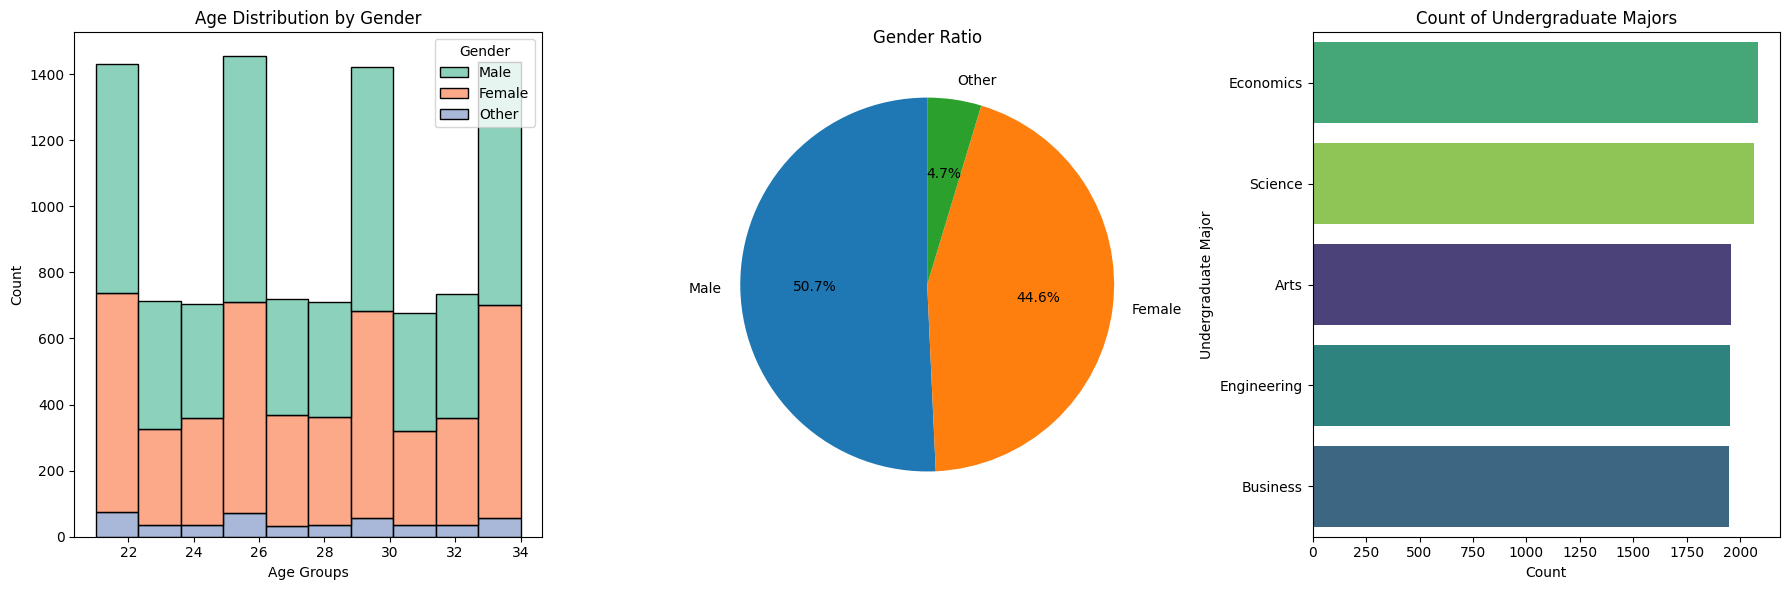

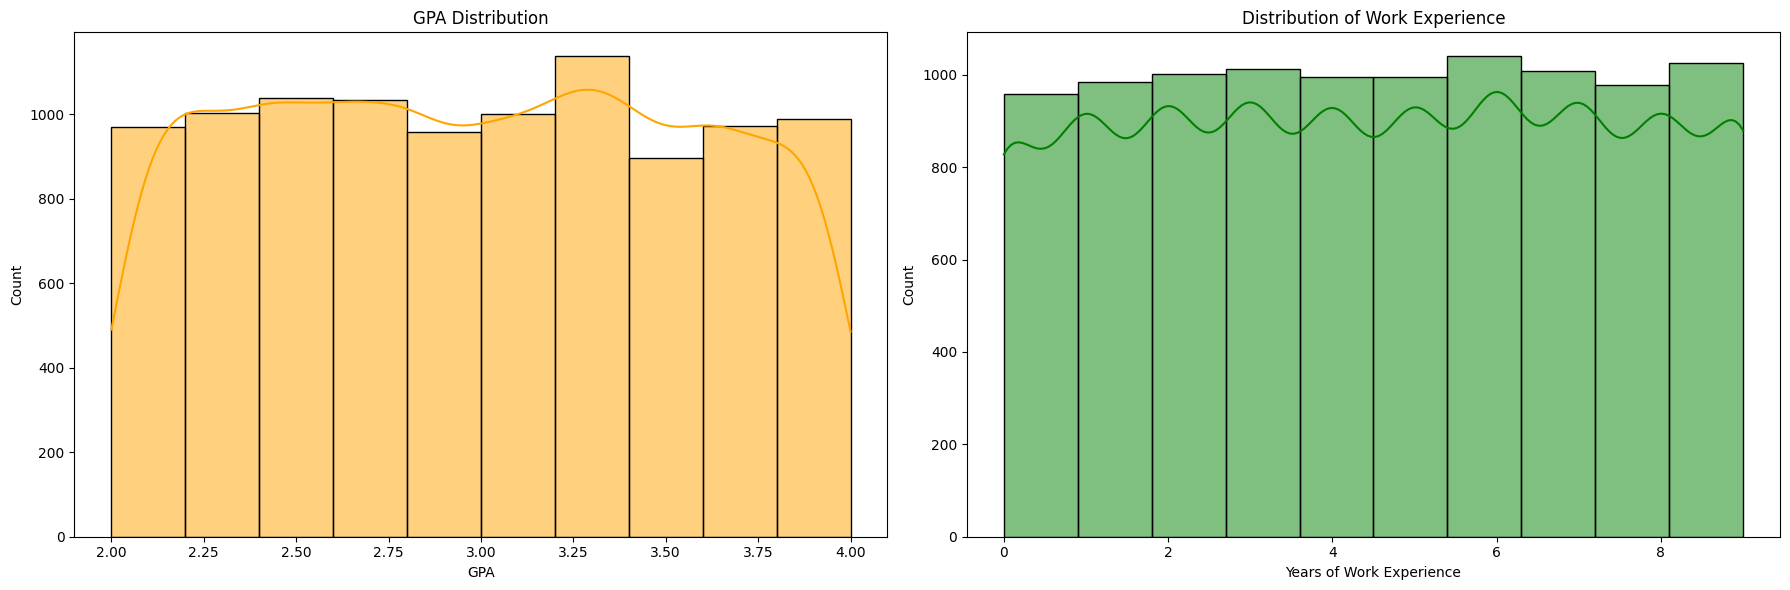

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a 1x3 grid of subplots (1 row, 3 columns)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # Adjust figsize to fit the plots

# First plot: Age Distribution (Histogram)
sns.histplot(data=df, x="Age", hue="Gender", multiple="stack", bins=10, palette="Set2",ax=axes[0])
axes[0].set_title("Age Distribution by Gender")
axes[0].set_xlabel("Age Groups")
axes[0].set_ylabel("Count")


# Second plot: Gender Ratio (Pie Chart)
gender_counts = df['Gender'].value_counts()
gender_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, ax=axes[1])
axes[1].set_title("Gender Ratio")
axes[1].set_ylabel("")  # Remove the y-axis label for the pie chart

# Third plot: Count of Undergraduate Majors (Countplot)
sns.countplot(
    data=df, 
    y='Undergraduate Major', 
    order=df['Undergraduate Major'].value_counts().index, 
    palette='viridis',  # Use palette
    hue='Undergraduate Major',  # Assign the hue variable
    dodge=False,  # Ensure bars are not split
    ax=axes[2]
)
axes[2].set_title('Count of Undergraduate Majors')
axes[2].set_xlabel('Count')
axes[2].set_ylabel('Undergraduate Major')
axes[2].legend([], [], frameon=False)  # Remove the legend if unnecessary

# Adjust layout to avoid overlap
plt.tight_layout()

# Create another set of plots for GPA and Work Experience

# Create a 1x2 grid for the remaining plots (GPA and Work Experience)
fig, axes = plt.subplots(1, 2, figsize=(18, 6))  # Adjust figsize to fit the plots

# Histogram for GPA distribution
sns.histplot(df['Undergraduate GPA'], bins=10, kde=True, color='orange', ax=axes[0])
axes[0].set_title('GPA Distribution')
axes[0].set_xlabel('GPA')
axes[0].set_ylabel('Count')

# Histogram for work experience
sns.histplot(df['Years of Work Experience'], bins=10, kde=True, color='green', ax=axes[1])
axes[1].set_title('Distribution of Work Experience')
axes[1].set_xlabel('Years of Work Experience')
axes[1].set_ylabel('Count')
fig.savefig('subplots.png')
plt.tight_layout()
plt.show()


Age Distribution by Gender:

The age distribution is fairly similar across genders, with the largest group being ages 22-24.

GPA Distribution:

The GPA distribution shows a peak around 3.0-3.25, with a skew towards higher GPAs.

Gender Ratio:

The gender ratio is approximately 50% female, 50% male, with a small "Other" category.

Undergraduate Majors:

The top majors by enrollment are Economics, Science, and Engineering.

Work Experience:

The distribution of work experience shows a cyclical pattern, with peaks around 2 and 6 years of experience.


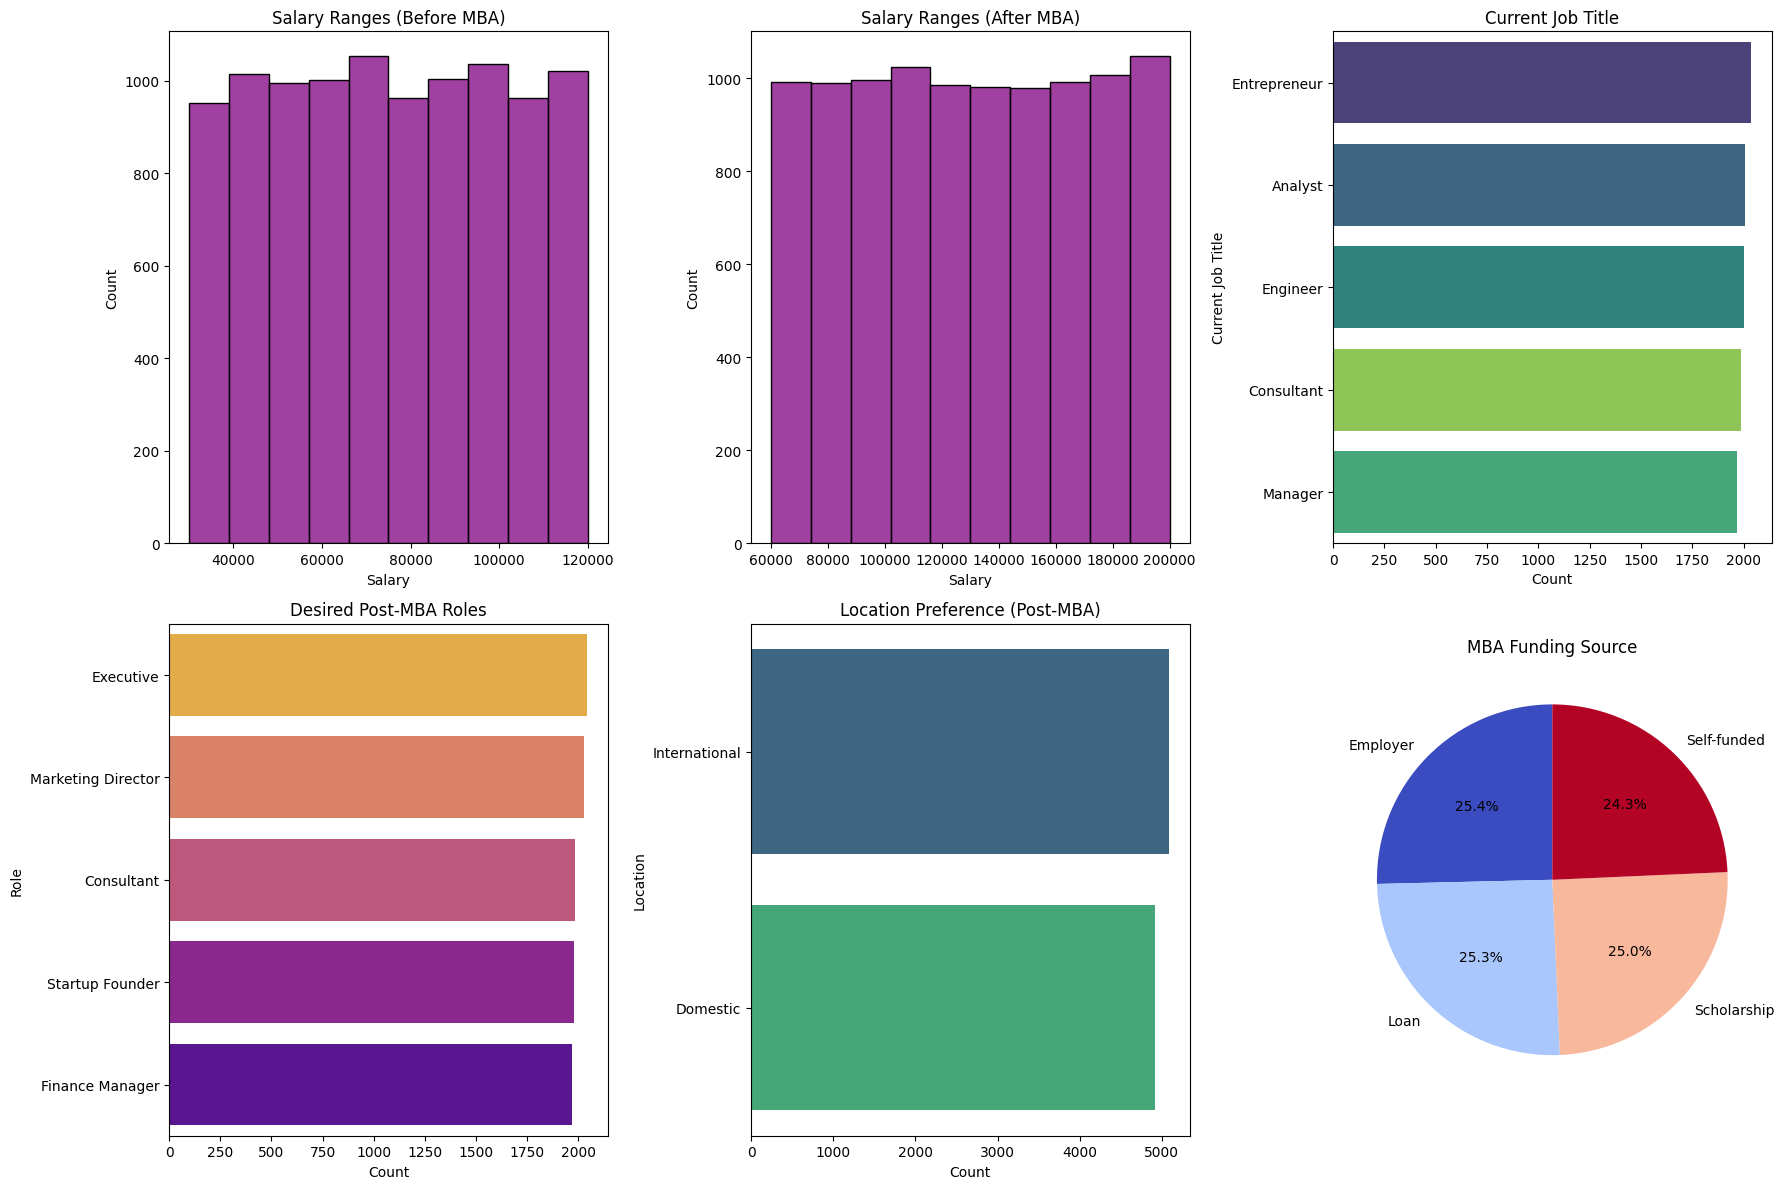

In [11]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))  # Adjust figsize to fit the plots (2 rows, 3 columns)

# Bar chart for salary ranges (Before MBA)
sns.histplot(df['Annual Salary (Before MBA)'], bins=10, kde=False, color='purple', ax=axes[0, 0])  # Corrected axis indexing
axes[0, 0].set_title('Salary Ranges (Before MBA)')
axes[0, 0].set_xlabel('Salary')
axes[0, 0].set_ylabel('Count')

# Bar chart for expected salary (After MBA)
sns.histplot(df['Expected Post-MBA Salary'], bins=10, kde=False, color='purple', ax=axes[0, 1])  # Corrected axis indexing
axes[0, 1].set_title('Salary Ranges (After MBA)')
axes[0, 1].set_xlabel('Salary')
axes[0, 1].set_ylabel('Count')

# Bar chart for job titles
sns.countplot(
    data=df, 
    y='Current Job Title', 
    order=df['Current Job Title'].value_counts().index, 
    palette='viridis',  # Use palette
    hue='Current Job Title',  # Assign the hue variable
    dodge=False,  # Ensure bars are not split
    ax=axes[0, 2]
)
axes[0, 2].set_title('Current Job Title')
axes[0, 2].set_xlabel('Count')
axes[0, 2].set_ylabel('Current Job Title')
axes[0, 2].legend([], [], frameon=False)  # Remove the legend if unnecessary

# Bar chart for desired post-MBA roles
sns.countplot(data=df, y='Desired Post-MBA Role', order=df['Desired Post-MBA Role'].value_counts().index,hue='Desired Post-MBA Role', palette='plasma', ax=axes[1, 0])
axes[1, 0].set_title('Desired Post-MBA Roles')
axes[1, 0].set_xlabel('Count')
axes[1, 0].set_ylabel('Role')

# Bar chart for location preferences
sns.countplot(
    data=df, 
    y='Location Preference (Post-MBA)', 
    order=df['Location Preference (Post-MBA)'].value_counts().index, 
    palette='viridis',  # Use palette
    hue='Location Preference (Post-MBA)',  # Assign the hue variable
    dodge=False,  # Ensure bars are not split
    ax=axes[1, 1]
)
axes[1, 1].set_title('Location Preference (Post-MBA)')
axes[1, 1].set_xlabel('Count')
axes[1, 1].set_ylabel('Location')
axes[1, 1].legend([], [], frameon=False)  # Remove the legend if unnecessary


# Pie chart for funding source
funding_counts = df['MBA Funding Source'].value_counts()
funding_counts.plot.pie(autopct='%1.1f%%', startangle=90, cmap='coolwarm')
plt.title('MBA Funding Source')
plt.ylabel('')  # Hide y-axis label
axes[1, 2].set_title('MBA Funding Source')
axes[1, 2].set_xlabel('')


# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plots
plt.show()


Salary Ranges:

Before MBA, salaries range from around $ 40,000  to $ 110,000.
After MBA, salaries range from around $ 60,000 to $ 900,000.

Current Job Titles:

Common roles include Entrepreneur, Analyst, Engineer, Consultant, and Manager.

Location Preferences:

Post-MBA, there is a preference for international locations over domestic.

MBA Funding Source:

The majority of MBA funding comes from employer sponsorship and self-funding.

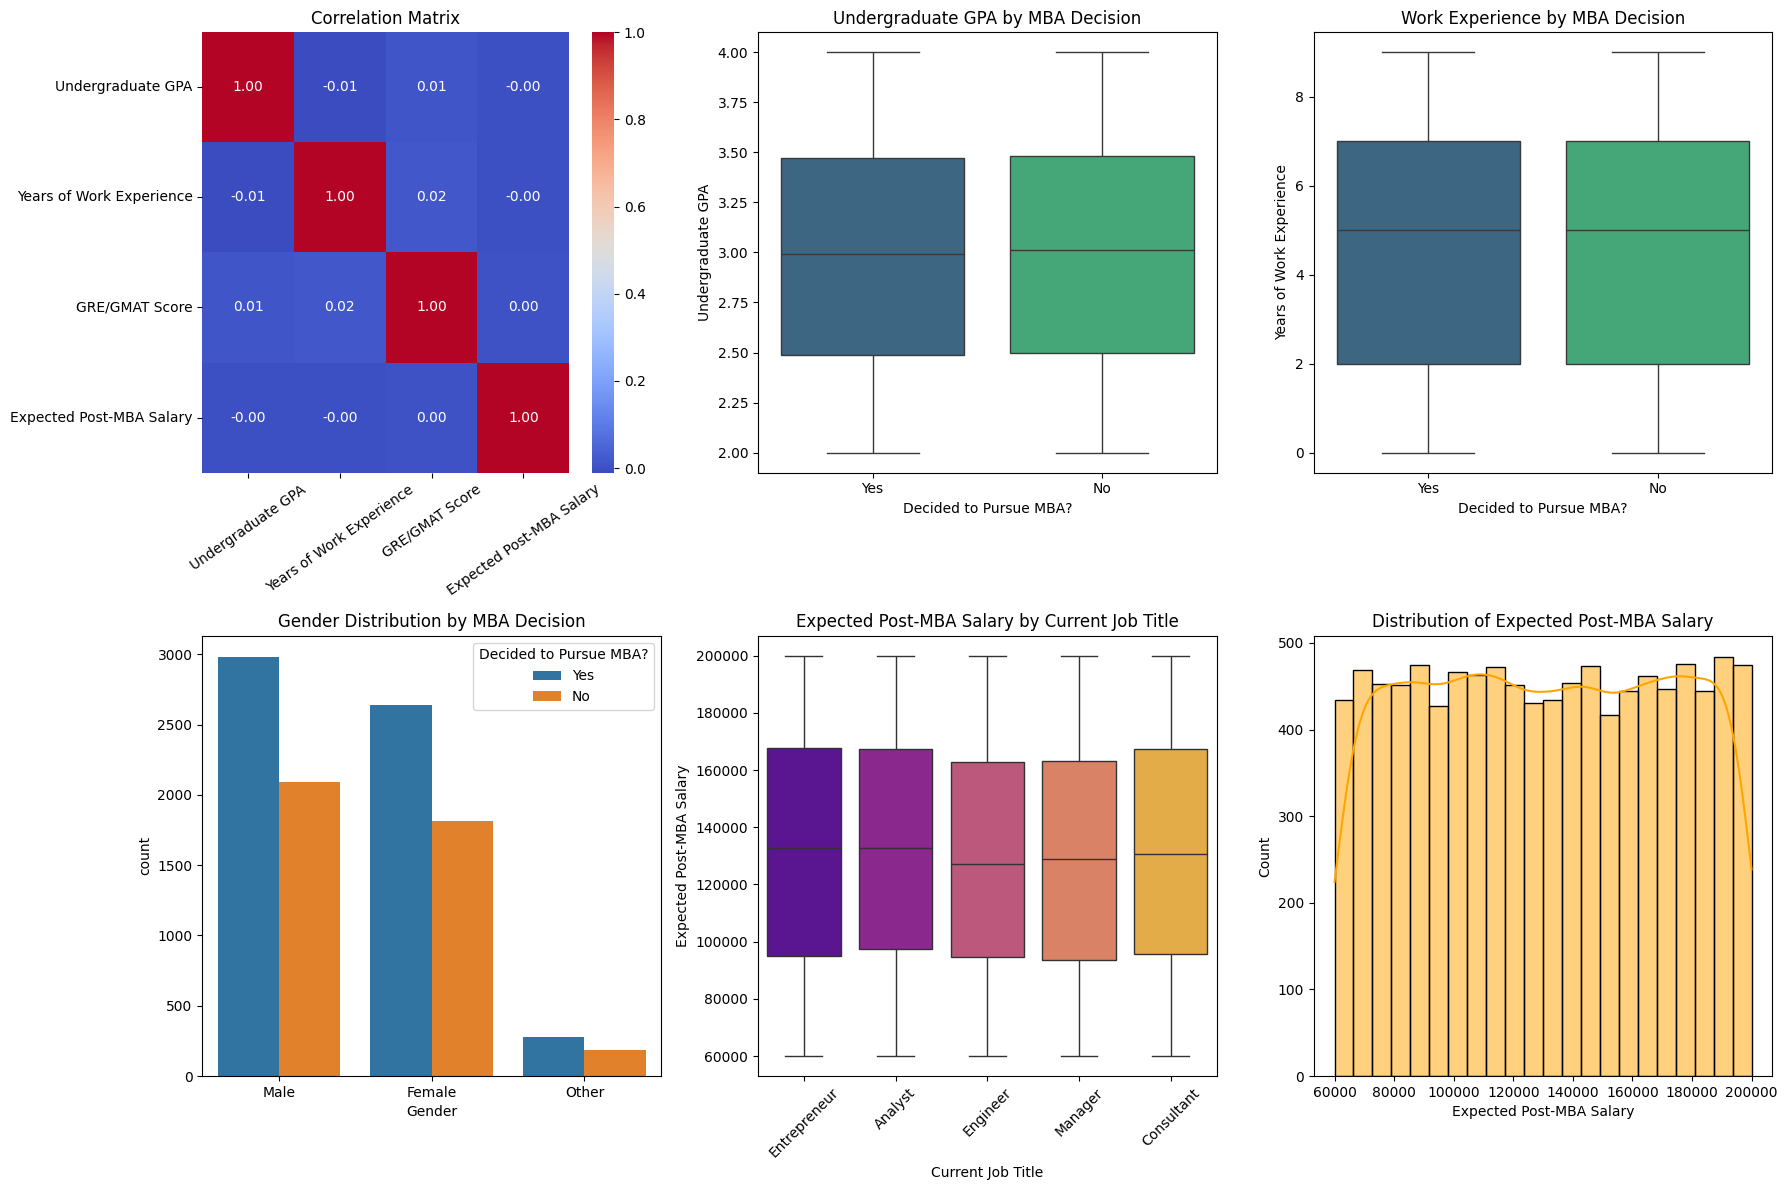

In [32]:
# Create a 3x3 grid of subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Correlation Matrix
correlation_matrix = df[['Undergraduate GPA', 'Years of Work Experience', 'GRE/GMAT Score', 'Expected Post-MBA Salary']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, ax=axes[0, 0])
axes[0, 0].set_title("Correlation Matrix")
axes[0, 0].tick_params(axis='x', rotation=35)

# Box plot for GPA by MBA Decision
sns.boxplot(x='Decided to Pursue MBA?', y='Undergraduate GPA', data=df, hue='Decided to Pursue MBA?', palette='viridis', ax=axes[0, 1], legend=False)
axes[0, 1].set_title('Undergraduate GPA by MBA Decision')

# Box plot for Years of Work Experience by MBA Decision
sns.boxplot(x='Decided to Pursue MBA?', y='Years of Work Experience', data=df, hue='Decided to Pursue MBA?', palette='viridis', ax=axes[0, 2], legend=False)
axes[0, 2].set_title('Work Experience by MBA Decision')

# Count plot for Gender by MBA Decision
sns.countplot(x='Gender', hue='Decided to Pursue MBA?', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Gender Distribution by MBA Decision')

# Box plot for Expected Salary by Current Job Title
sns.boxplot(x='Current Job Title', y='Expected Post-MBA Salary', data=df, hue='Current Job Title', palette='plasma', ax=axes[1, 1], legend=False)
axes[1, 1].set_title('Expected Post-MBA Salary by Current Job Title')
axes[1, 1].tick_params(axis='x', rotation=45)

# Distribution plot for Expected Post-MBA Salary
sns.histplot(df['Expected Post-MBA Salary'], kde=True, color='orange', ax=axes[1, 2])
axes[1, 2].set_title('Distribution of Expected Post-MBA Salary')

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()


Correlation Matrix:

Undergraduate GPA and GMAT/GRE score have a strong positive correlation.
Work experience has a weak negative correlation with undergraduate GPA.
Expected post-MBA salary has a weak positive correlation with various factors.

Undergraduate GPA by MBA Decision:

Those who decided to pursue an MBA tend to have higher undergraduate GPAs.

Work Experience by MBA Decision:

Those who decided to pursue an MBA generally have more work experience.

Gender Distribution by MBA Decision:

The gender distribution is roughly 60% male, 40% female among those who decided to pursue an MBA.

Expected Post-MBA Salary by Current Job Title:

Expected salaries are highest for entrepreneurial and management roles.

Distribution of Expected Post-MBA Salary:

The distribution shows a range from around $60,000 to $200,000+.

Let me know if you need any clarification or have additional questions! CopyRetryClaude can make mistakes. Please double-check responses.

**Final Findings**

This dataset highlights key trends among MBA candidates, including demographic patterns, academic and professional backgrounds, and salary expectations. The data reveals balanced gender representation, a preference for international job opportunities post-MBA, and a significant increase in salaries after completing the degree. Candidates with strong academic performance and substantial work experience are more likely to pursue an MBA, with entrepreneurial and management roles offering the highest expected returns. Employer sponsorship and self-funding are the primary sources of MBA funding, reflecting the commitment of candidates and their organizations toward advanced education.

The findings suggest that pursuing an MBA correlates with career advancement, international mobility, and financial growth.